# Agregacija združevanje in tranformacija podatkov

## Data Aggregation

### Introduction to the Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')

In [3]:
happiness2015[:5]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

### Aggregate Data with Loops

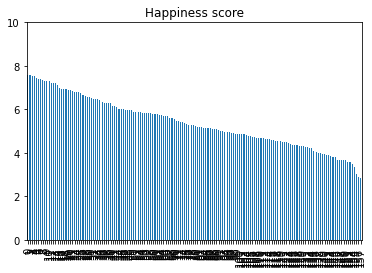

In [5]:
happiness2015["Happiness Score"].plot(kind="bar", title="Happiness score", ylim=(0,10))
plt.show()

In [6]:
happiness2015["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [7]:
so_asia = happiness2015[happiness2015["Region"] == 'Southern Asia']

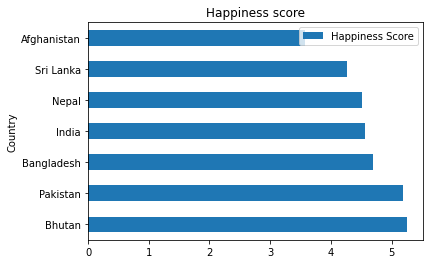

In [8]:
so_asia.plot(x="Country", y="Happiness Score", kind="barh", title="Happiness score", ylim=(0,10))
plt.show()

In [9]:
mean_happiness = {}
regions = happiness2015['Region'].unique()

for r in regions:
    #1. Split the dataframe into groups.
    region_group = happiness2015[happiness2015['Region'] == r]
    #2. Apply a function to each group.
    region_mean = region_group['Happiness Score'].mean()
    #3. Combine the results into one data structure.
    mean_happiness[r] = region_mean

In [10]:
mean_happiness

{'Western Europe': 6.689619047619048,
 'North America': 7.273,
 'Australia and New Zealand': 7.285,
 'Middle East and Northern Africa': 5.406899999999999,
 'Latin America and Caribbean': 6.1446818181818195,
 'Southeastern Asia': 5.317444444444444,
 'Central and Eastern Europe': 5.332931034482757,
 'Eastern Asia': 5.626166666666666,
 'Sub-Saharan Africa': 4.2028,
 'Southern Asia': 4.580857142857143}

### GroupBy Operation

<img src="./images/split_apply_combine.svg">

#### Creating GroupBy Objects

<img src="./images/Groups.svg">

In [11]:
happiness2015.groupby("Region")["Happiness Score"].mean()

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [30]:
#happiness2015.groupby("Region")["Happiness Score"].max()
happiness2015.groupby("Region").max()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,,
Australia and New Zealand,New Zealand,10,7.286,0.04083,1.33358,1.31967,0.93156,0.65124,0.42922,0.47501,2.26646
Central and Eastern Europe,Uzbekistan,134,6.505,0.06913,1.18498,1.34043,0.87337,0.65821,0.38331,0.30030,3.10712
Eastern Asia,Taiwan,100,6.298,0.05051,1.38604,1.30060,1.01328,0.59608,0.37124,0.39478,2.32323
Latin America and Caribbean,Venezuela,119,7.226,0.13693,1.21183,1.30477,0.86027,0.63376,0.24558,0.46187,3.60214
Middle East and Northern Africa,Yemen,156,7.278,0.07832,1.69042,1.22393,0.91387,0.64157,0.52208,0.47179,3.08854
North America,United States,15,7.427,0.03839,1.39451,1.32261,0.90563,0.63297,0.32957,0.45811,2.51011
Southeastern Asia,Vietnam,145,6.798,0.06698,1.52186,1.26504,1.02525,0.66246,0.49210,0.79588,2.31945
Southern Asia,Sri Lanka,153,5.253,0.03751,0.83524,1.10395,0.70806,0.53726,0.15445,0.47998,3.10709
Sub-Saharan Africa,Zimbabwe,158,5.477,0.11068,1.06024,1.18468,0.70950,0.59201,0.55191,0.50318,3.05137


In [13]:
happiness2015.groupby("Region").min()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,,
Australia and New Zealand,Australia,9,7.284,0.03371,1.25018,1.30923,0.90837,0.63938,0.35637,0.43562,2.26425
Central and Eastern Europe,Albania,31,4.218,0.03135,0.39047,0.38562,0.53886,0.09245,0.00227,0.00199,0.89991
Eastern Asia,China,38,4.874,0.02424,0.82819,0.94675,0.60268,0.33208,0.02666,0.08185,0.65429
Latin America and Caribbean,Argentina,12,4.518,0.04076,0.26673,0.74302,0.38847,0.24425,0.01140,0.05841,1.21305
Middle East and Northern Africa,Algeria,11,3.006,0.03260,0.54649,0.47489,0.40064,0.00000,0.04582,0.06431,0.32858
North America,Canada,5,7.119,0.03553,1.32629,1.24711,0.86179,0.54604,0.15890,0.40105,2.45176
Southeastern Asia,Cambodia,24,3.819,0.02596,0.27108,0.62736,0.48246,0.44017,0.00000,0.16860,0.98195
Southern Asia,Afghanistan,79,3.575,0.02043,0.31982,0.30285,0.30335,0.12102,0.05907,0.21222,0.67108
Sub-Saharan Africa,Angola,71,2.839,0.03464,0.00000,0.00000,0.00000,0.10081,0.03060,0.06822,0.67042


#### Agg() Method

In [14]:
import numpy as np

In [15]:
def dif(group):
    return (group.max() - group.mean())

In [16]:
happiness2015.groupby("Region")["Happiness Score"].agg([np.mean, np.max, dif])

,mean,amax,dif
Region,,,
Australia and New Zealand,7.285000,7.286,0.001000
Central and Eastern Europe,5.332931,6.505,1.172069
Eastern Asia,5.626167,6.298,0.671833
Latin America and Caribbean,6.144682,7.226,1.081318
Middle East and Northern Africa,5.406900,7.278,1.871100
North America,7.273000,7.427,0.154000
Southeastern Asia,5.317444,6.798,1.480556
Southern Asia,4.580857,5.253,0.672143
Sub-Saharan Africa,4.202800,5.477,1.274200


In [17]:
happiness2015.groupby("Region")["Freedom"].mean().sort_values()

Region
Central and Eastern Europe         0.358269
Middle East and Northern Africa    0.361751
Sub-Saharan Africa                 0.365944
Southern Asia                      0.373337
Eastern Asia                       0.462490
Latin America and Caribbean        0.501740
Western Europe                     0.549926
Southeastern Asia                  0.557104
North America                      0.589505
Australia and New Zealand          0.645310
Name: Freedom, dtype: float64

### Pivot Tables

<img src="./images/PV_Syntax.svg">

In [39]:
happiness2015.pivot_table(index="Region",values="Happiness Score", aggfunc=[np.mean,np.max,np.min])

,mean,amax,amin
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.285000,7.286,7.284
Central and Eastern Europe,5.332931,6.505,4.218
Eastern Asia,5.626167,6.298,4.874
Latin America and Caribbean,6.144682,7.226,4.518
Middle East and Northern Africa,5.406900,7.278,3.006
North America,7.273000,7.427,7.119
Southeastern Asia,5.317444,6.798,3.819
Southern Asia,4.580857,5.253,3.575


In [41]:
pv_happiness = happiness2015.pivot_table("Happiness Score","Region")

<AxesSubplot:title={'center':'Mean Happiness Scores by Region'}, ylabel='Region'>

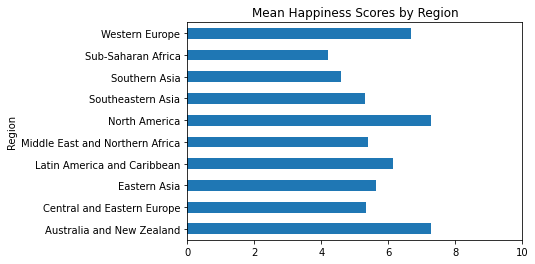

In [45]:
pv_happiness.plot(kind="barh",title="Mean Happiness Scores by Region",legend=False,xlim=(0,10))

In [49]:
pv_happiness = happiness2015.pivot_table("Happiness Score","Region",margins=True)

In [50]:
pv_happiness

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


<AxesSubplot:title={'center':'Mean Happiness Scores by Region'}, ylabel='Region'>

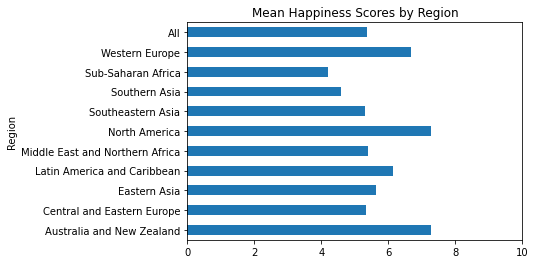

In [48]:
pv_happiness.plot(kind="barh",title="Mean Happiness Scores by Region",legend=False,xlim=(0,10))

## Pandas DataFrame all() Method

In [51]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [52]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [55]:
np.all(["nsaidf","dsifds"])

TypeError: cannot perform reduce with flexible type

In [56]:
happiness2015["Region"].all()

True

In [57]:
happiness2015.all()

Country                           True
Region                            True
Happiness Rank                    True
Happiness Score                   True
Standard Error                    True
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Dystopia Residual                 True
dtype: bool

In [58]:
happiness2015[happiness2015["Generosity"]==0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
101,Greece,Western Europe,102,4.857,0.05062,1.15406,0.92933,0.88213,0.07699,0.01397,0.0,1.80101


In [64]:
happiness2015.all(axis="columns").head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

## Combining Data

In [65]:
import pandas as pd

happiness2015 = pd.read_csv("data/World_Happiness_2015.csv")
happiness2016 = pd.read_csv("data/World_Happiness_2016.csv")
happiness2017 = pd.read_csv("data/World_Happiness_2017.csv")

In [70]:
happiness2015["Year"] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

In [71]:
happiness2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015


In [72]:
happiness2016

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016


In [73]:
happiness2017

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,2017
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,2017
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2017
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,2017


### Combining Dataframes with the Concat Function

<img src="./images/Concat_Updated.svg">

<img src="./images/Concat_Axis1.svg">

<img src="./images/Concat_syntax.svg">

In [76]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2015

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015


In [77]:
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
head_2016

,Country,Happiness Score,Year
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


In [80]:
concat_axis0 = pd.concat([head_2015,head_2016],axis=0)
concat_axis0

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


In [83]:
concat_axis1 = pd.concat([head_2015,head_2016],axis=1)
concat_axis1

,Country,Happiness Score,Year,Country,Happiness Score,Year
0,Switzerland,7.587,2015,Denmark,7.526,2016
1,Iceland,7.561,2015,Switzerland,7.509,2016
2,Denmark,7.527,2015,Iceland,7.501,2016


In [84]:
subjects = ['Year','Country','Happiness Score', 'Standard Error']

In [86]:
head_2015 = happiness2015[subjects].head(4)
head_2015

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880


In [92]:
head_2016 = happiness2016[['Year','Country','Happiness Score']].head(3)
head_2016

,Year,Country,Happiness Score
0,2016,Denmark,7.526
1,2016,Switzerland,7.509
2,2016,Iceland,7.501


In [93]:
concat_axis0 = pd.concat([head_2015,head_2016],axis=0, sort=False)
concat_axis0

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
0,2016,Denmark,7.526,NaN
1,2016,Switzerland,7.509,NaN
2,2016,Iceland,7.501,NaN


In [94]:
concat_axis1 = pd.concat([head_2015,head_2016],axis=1, sort=False)
concat_axis1

,Year,Country,Happiness Score,Standard Error,Year,Country,Happiness Score
0,2015,Switzerland,7.587,0.03411,2016.0,Denmark,7.526
1,2015,Iceland,7.561,0.04884,2016.0,Switzerland,7.509
2,2015,Denmark,7.527,0.03328,2016.0,Iceland,7.501
3,2015,Norway,7.522,0.03880,NaN,NaN,NaN


<img src="./images/Concat_DifShapes.svg">

In [99]:
concat_update_index = pd.concat([head_2015,head_2016],axis=0,ignore_index=True,sort=False)
concat_update_index

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
4,2016,Denmark,7.526,NaN
5,2016,Switzerland,7.509,NaN
6,2016,Iceland,7.501,NaN


### Joining Dataframes with the Merge Function

<img src="./images/Merge_link.svg">

<img src="./images/Merge.svg">

<img src="./images/Merge_syntax.svg">

In [103]:
head_2015

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880


In [104]:
head_2016

,Year,Country,Happiness Score
0,2016,Denmark,7.526
1,2016,Switzerland,7.509
2,2016,Iceland,7.501


In [102]:
pd.merge(left=head_2015,right=head_2016,on="Country")

,Year_x,Country,Happiness Score_x,Standard Error,Year_y,Happiness Score_y
0,2015,Switzerland,7.587,0.03411,2016,7.509
1,2015,Iceland,7.561,0.04884,2016,7.501
2,2015,Denmark,7.527,0.03328,2016,7.526


In [100]:
three_2015 = happiness2015[["Country",'Happiness Rank','Year']].iloc[2:5]
three_2015

,Country,Happiness Rank,Year
2,Denmark,3,2015
3,Norway,4,2015
4,Canada,5,2015


In [101]:
three_2016 = happiness2016[["Country",'Happiness Rank','Year']].iloc[2:5]
three_2016

,Country,Happiness Rank,Year
2,Iceland,3,2016
3,Norway,4,2016
4,Finland,5,2016


In [107]:
pd.merge(left=three_2015,right=three_2016,on="Country")

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


In [108]:
pd.merge(left=three_2015,right=three_2016,on="Country",how="left")

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


In [109]:
pd.merge(left=three_2015,right=three_2016,on="Country",how="right")

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Iceland,NaN,NaN,3,2016
1,Norway,4.0,2015.0,4,2016
2,Finland,NaN,NaN,5,2016


In [110]:
pd.merge(left=three_2015,right=three_2016,on="Country",how="outer")

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Denmark,3.0,2015.0,NaN,NaN
1,Norway,4.0,2015.0,4.0,2016.0
2,Canada,5.0,2015.0,NaN,NaN
3,Iceland,NaN,NaN,3.0,2016.0
4,Finland,NaN,NaN,5.0,2016.0


In [113]:
merged_updated_suffixes = pd.merge(left=three_2015,right=three_2016,on="Country",how="left",suffixes=["_2015","_2016"])
merged_updated_suffixes

,Country,Happiness Rank_2015,Year_2015,Happiness Rank_2016,Year_2016
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


#### Joining on Columns

#### Left Joins

#### Join on Index

<img src="./images/Index.svg">

In [114]:
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
four_2015

,Country,Happiness Rank,Year
2,Denmark,3,2015
3,Norway,4,2015
4,Canada,5,2015
5,Finland,6,2015


In [115]:
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016

,Country,Happiness Rank,Year
2,Iceland,3,2016
3,Norway,4,2016
4,Finland,5,2016


In [117]:
pd.merge(left=four_2015,right=three_2016,left_index=True,right_index=True,suffixes=["_2015","_2016"])

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3,2016
3,Norway,4,2015,Norway,4,2016
4,Canada,5,2015,Finland,5,2016


In [118]:
pd.merge(left=four_2015,right=three_2016,left_index=True,right_index=True,suffixes=["_2015","_2016"],how="left")

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3.0,2016.0
3,Norway,4,2015,Norway,4.0,2016.0
4,Canada,5,2015,Finland,5.0,2016.0
5,Finland,6,2015,NaN,NaN,NaN


### Primer: Combine Data and Create a Visualization


<table class="tg">
<tbody><tr>
<th></th>
<th><span style="font-weight:bold">pd.concat()</span></th>
<th><span style="font-weight:bold">pd.merge()</span></th>
</tr>
<tr>
<td><span style="font-style:normal">Default Join Type</span></td>
<td><span style="font-weight:300;font-style:normal">Outer</span></td>
<td><span style="font-weight:300;font-style:normal">Inner</span></td>
</tr>
<tr>
<td><span style="font-style:normal">Can Combine More Than Two Dataframes at a Time?</span></td>
<td><span style="font-weight:300;font-style:normal">Yes</span></td>
<td><span style="font-weight:300;font-style:normal">No</span></td>
</tr>
<tr>
<td><span style="font-style:normal">Can Combine Dataframes Vertically</span><br><span style="font-style:normal">(axis=0) or Horizontally (axis=1)?</span><br></td>
<td><span style="font-weight:300;font-style:normal">Both</span></td>
<td><span style="font-weight:300;font-style:normal">Horizontally</span></td>
</tr>
<tr>
<td>Syntax</td>
<td><span style="font-weight:bold">Concat (Vertically)</span><br>concat([df1,df2,df3])<br><br><span style="font-weight:bold">Concat (Horizontally)</span><br>concat([df1,df2,df3], axis = 1)<br><br><br><br></td>
<td><span style="font-weight:bold">Merge (Join on Columns)</span><br>merge(left = df1, right = df2, how = 'join_type', on = 'Col')<br><br><span style="font-weight:bold">Merge (Join on Index)</span><br>merge(left = df1, right = df2, how = 'join_type', left_index = True, right_index = True)<br><br><br><br></td>
</tr>
</tbody></table>


In [120]:
means = happiness2015.pivot_table("Happiness Score","Region",aggfunc=np.mean)
means

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


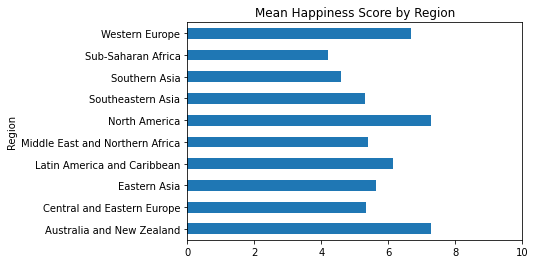

In [124]:
means.plot(kind="barh",title="Mean Happiness Score by Region",xlim=(0,10),legend=False)
plt.show()

In [127]:
happiness2017

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,2017
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,2017
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2017
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,2017


In [132]:
happiness2017.rename(columns={"Happiness.Score":"Happiness Score"},inplace=True)
happiness2017

,Country,Happiness.Rank,Happiness Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,2017
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,2017
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2017
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,2017


In [133]:
combined = pd.concat([happiness2015,happiness2016,happiness2017])
combined

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Year,Lower Confidence Interval,Upper Confidence Interval,Happiness.Rank,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.349510,0.94143,0.665570,0.41978,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.402230,0.94784,0.628770,0.14145,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.360580,0.87464,0.649380,0.48357,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.330950,0.88521,0.669730,0.36503,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.322610,0.90563,0.632970,0.32957,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,NaN,NaN,3.471,NaN,NaN,0.945707,NaN,0.581844,NaN,...,2017,NaN,NaN,151.0,3.543030,3.398970,0.368746,0.326425,0.455220,0.540061
151,Syria,NaN,NaN,3.462,NaN,NaN,0.396103,NaN,0.081539,NaN,...,2017,NaN,NaN,152.0,3.663669,3.260331,0.777153,0.500533,0.151347,1.061574
152,Tanzania,NaN,NaN,3.349,NaN,NaN,1.041990,NaN,0.390018,NaN,...,2017,NaN,NaN,153.0,3.461430,3.236570,0.511136,0.364509,0.066035,0.621130
153,Burundi,NaN,NaN,2.905,NaN,NaN,0.629794,NaN,0.059901,NaN,...,2017,NaN,NaN,154.0,3.074690,2.735310,0.091623,0.151611,0.084148,1.683024


In [135]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 154
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Rank                 315 non-null    float64
 3   Happiness Score                470 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       315 non-null    float64
 6   Family                         470 non-null    float64
 7   Health (Life Expectancy)       315 non-null    float64
 8   Freedom                        470 non-null    float64
 9   Trust (Government Corruption)  315 non-null    float64
 10  Generosity                     470 non-null    float64
 11  Dystopia Residual              315 non-null    float64
 12  Year                           470 non-null    int

In [138]:
pivot_table_combined = combined.pivot_table(index="Year",values="Happiness Score")
pivot_table_combined

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


<AxesSubplot:title={'center':'Mean Happiness Score per Year'}, ylabel='Year'>

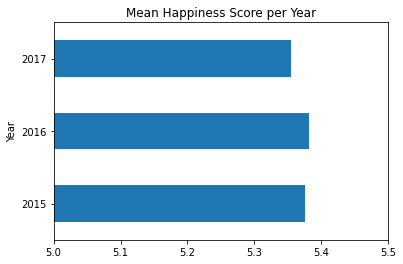

In [144]:
pivot_table_combined.plot(kind="barh",title="Mean Happiness Score per Year",legend=False,xlim=(5,5.5))

## Transforming Data

In [160]:
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')

In [161]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [162]:
mapping = {'Economy (GDP per Capita)': 'Economy', 
           'Health (Life Expectancy)': 'Health', 
           'Trust (Government Corruption)': 'Trust' }

In [163]:
happiness2015.rename(mapping,axis=1,inplace=True)
happiness2015 = happiness2015.rename(mapping,axis=1)

In [164]:
happiness2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


### Map and Apply Methods (Element-wise)

In [158]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

<img src="./images/Map_generic.svg">

In [173]:
economy_impact_map = happiness2015["Economy"].map(label)

In [174]:
economy_impact_map.head()

0    High
1    High
2    High
3    High
4    High
Name: Economy, dtype: object

In [171]:
economy_impact_apply = happiness2015["Economy"].apply(label)

In [172]:
economy_impact_apply

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

In [176]:
(economy_impact_map == economy_impact_apply).all()

True

In [177]:
happiness2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [178]:
happiness2015["Economy Impact"] = happiness2015["Economy"].map(label)
happiness2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Economy Impact
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,High
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,High
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,Low
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,Low
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,Low
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,Low


<img src="./images/Map.svg">

In [179]:
def label2(element,x):
    if element > x:
        return "High"
    else:
        return "Low"

In [181]:
#happiness2015["Economy"].map(label2,x=0.8)

TypeError: map() got an unexpected keyword argument 'x'

In [187]:
happiness2015["Economy"].apply(label2,x=0.8)

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

### Applymap Method (Element-wise to Multiple Columns)

In [189]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Economy Impact,Economy Impect
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High,High
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High,High
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,High,High
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,High,High
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,High,High


In [198]:
happiness2015["Economy Impact"] = happiness2015["Economy"].apply(label2,x=1)
happiness2015["Health Impact"] = happiness2015["Health"].apply(label2,x=1)
happiness2015["Family Impact"] = happiness2015["Family"].apply(label2,x=1)

In [199]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Economy Impact,Health Impact,Family Impact
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High,Low,High
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High,Low,High
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,High,Low,High
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,High,Low,High
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,High,Low,High


In [206]:
factors = ["Economy","Family","Health","Freedom","Trust","Generosity"]

In [207]:
factors_impact = happiness2015[factors].applymap(label2,x=1)

In [208]:
factors_impact.head()

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low


### Apply Method (along an Axis)

In [212]:
type(factors_impact)

pandas.core.frame.DataFrame

In [216]:
factors_impact.apply(pd.value_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
Low,92,69,156,158.0,158.0,158.0


<table class="tg">
<tbody><tr>
<th><span style="font-weight:bold">Method<br></span></th>
<th><span style="font-weight:bold">Series or Dataframe Method</span></th>
<th><span style="font-weight:bold">Applies Functions Element-wise?</span></th>
</tr>
<tr>
<td>Map</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Applymap</td>
<td>Dataframe</td>
<td>Yes</td>
</tr>
</tbody></table>

<img src="./images/Apply_counts.svg">

In [213]:
pd.value_counts(factors_impact["Economy"])

Low     92
High    66
Name: Economy, dtype: int64

In [217]:
def v_counts(col):
    num = col.value_counts()
    len_ = col.size
    return num/len_

In [218]:
v_counts_pct = factors_impact.apply(v_counts)

In [219]:
v_counts_pct

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


In [220]:
def nan_to_zero(element):
    if np.isnan(element):
        return 0.0
    else:
        return element

In [222]:
v_counts_pct[["Economy","Family","Health","Freedom","Trust","Generosity"]].applymap(nan_to_zero)

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,0.0,0.0,0.0
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


In [223]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

In [224]:
happiness2015["Factor Sum"] = happiness2015[factors].sum(axis=1)

In [226]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Economy Impact,Health Impact,Family Impact,Factor Sum
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High,Low,High,7.58696
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High,Low,High,7.56092
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,High,Low,High,7.52708
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,High,Low,High,7.52222
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,High,Low,High,7.42694


In [229]:
happiness2015[["Happiness Score","Factor Sum"]].head()

,Happiness Score,Factor Sum
0,7.587,7.58696
1,7.561,7.56092
2,7.527,7.52708
3,7.522,7.52222
4,7.427,7.42694


In [230]:
def percetages(col):
    div = col/happiness2015["Happiness Score"]
    return div*100

In [231]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

In [233]:
factor_percentages = happiness2015[factors].apply(percetages)

In [235]:
factor_percentages["Country"] = happiness2015["Country"]

In [236]:
factor_percentages

,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Country
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691,33.180177,Switzerland
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401,35.736146,Iceland
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539,33.108011,Denmark
3,19.396437,17.694097,11.768280,8.903616,4.852832,4.613002,32.774661,Norway
4,17.857681,17.808132,12.193753,8.522553,4.437458,6.168170,33.011445,Canada
...,...,...,...,...,...,...,...,...
153,6.409235,22.329004,12.370563,17.085426,15.928139,6.530447,19.348341,Rwanda
154,8.582335,10.594611,9.553892,14.505988,2.398204,5.467066,48.900599,Benin
155,22.062542,15.798071,24.016301,5.217565,6.289421,15.694943,10.930805,Syria
156,0.526678,14.315663,7.709466,4.079174,3.463683,6.790706,63.098795,Burundi


### Melt Function

In [238]:
happy_two = happiness2015.head(2)

In [239]:
happy_two

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Economy Impact,Health Impact,Family Impact,Factor Sum
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High,Low,High,7.58696
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High,Low,High,7.56092


In [240]:
pd.melt(frame=happy_two, id_vars=["Country"], value_vars=["Economy","Family","Health"])

,Country,variable,value
0,Switzerland,Economy,1.39651
1,Iceland,Economy,1.30232
2,Switzerland,Family,1.34951
3,Iceland,Family,1.40223
4,Switzerland,Health,0.94143
5,Iceland,Health,0.94784


<img src="./images/Melt_Syntax.svg">

In [241]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

In [244]:
melt_df = pd.melt(happiness2015,id_vars = main_cols, value_vars = factors)
melt_df

,Country,Region,Happiness Rank,Happiness Score,variable,value
0,Switzerland,Western Europe,1,7.587,Economy,1.39651
1,Iceland,Western Europe,2,7.561,Economy,1.30232
2,Denmark,Western Europe,3,7.527,Economy,1.32548
3,Norway,Western Europe,4,7.522,Economy,1.45900
4,Canada,North America,5,7.427,Economy,1.32629
...,...,...,...,...,...,...
1101,Rwanda,Sub-Saharan Africa,154,3.465,Dystopia Residual,0.67042
1102,Benin,Sub-Saharan Africa,155,3.340,Dystopia Residual,1.63328
1103,Syria,Middle East and Northern Africa,156,3.006,Dystopia Residual,0.32858
1104,Burundi,Sub-Saharan Africa,157,2.905,Dystopia Residual,1.83302


In [247]:
melt_df["Percentage"] = round(melt_df["value"]/melt_df["Happiness Score"]*100,2)
melt_df

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86
...,...,...,...,...,...,...,...
1101,Rwanda,Sub-Saharan Africa,154,3.465,Dystopia Residual,0.67042,19.35
1102,Benin,Sub-Saharan Africa,155,3.340,Dystopia Residual,1.63328,48.90
1103,Syria,Middle East and Northern Africa,156,3.006,Dystopia Residual,0.32858,10.93
1104,Burundi,Sub-Saharan Africa,157,2.905,Dystopia Residual,1.83302,63.10


### Primer: Aggregate the Data and Create a Visualization

In [252]:
melt_df.groupby("variable")["value"].mean()

variable
Dystopia Residual    2.098977
Economy              0.846137
Family               0.991046
Freedom              0.428615
Generosity           0.237296
Health               0.630259
Trust                0.143422
Name: value, dtype: float64

In [251]:
melt_df.groupby("variable")["Percentage"].mean()

variable
Dystopia Residual    39.668038
Economy              15.144494
Family               18.427468
Freedom               8.027975
Generosity            4.565316
Health               11.524494
Trust                 2.643165
Name: Percentage, dtype: float64

In [261]:
pv_melt = melt_df.pivot_table(index="variable",values="value",aggfunc=np.mean)
pp_melt = melt_df.pivot_table(index="variable",values="Percentage",aggfunc=np.mean)

In [262]:
pv_melt

,value
variable,
Dystopia Residual,2.098977
Economy,0.846137
Family,0.991046
Freedom,0.428615
Generosity,0.237296
Health,0.630259
Trust,0.143422


In [263]:
pp_melt

,Percentage
variable,
Dystopia Residual,39.668038
Economy,15.144494
Family,18.427468
Freedom,8.027975
Generosity,4.565316
Health,11.524494
Trust,2.643165


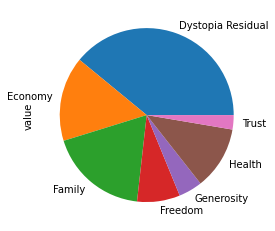

In [266]:
pv_melt.plot(kind="pie",y="value",legend=False)
plt.show()

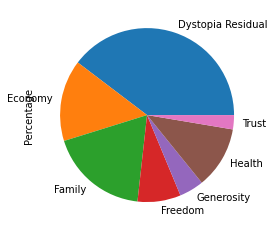

In [268]:
pp_melt.plot(kind="pie",y="Percentage",legend=False)
plt.show()


<table class="tg">
<tbody><tr>
<th><span style="font-weight:bold">Method<br></span></th>
<th><span style="font-weight:bold">Series or Dataframe Method</span></th>
<th><span style="font-weight:bold">Applies Functions Element-wise?</span></th>
</tr>
<tr>
<td>Map</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Applymap</td>
<td>Dataframe</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Dataframe</td>
<td>No, applies functions along an axis</td>
</tr>
</tbody></table>

## Vaja

In [304]:
import pandas as pd
import json

json_data_path = "./data/honeypot.json"

In [305]:
# prenesi podatke in jih shrani kot dataframe
def load_raw_dataframe(file_path):
    with open(file_path,"r") as log_file:
        data = log_file.readlines()
    data = [json.loads(line) for line in data]
    df = pd.DataFrame(data)
    return df

honeypot_data = load_raw_dataframe(json_data_path)

In [306]:
# prikažite honeypot_data
honeypot_data.head()

,honeypot_id,session,dst_port,technology,timestamp,method,url,src_ip,headers,ip_longitude,ip_latitude,country_name
0,cyberlab_local_01_prod_212_101_137_37,ed4aa370e653c758,9000,hikvision_ip_dome_v4.0.1_build_190820,2021-08-11T17:02:44.728,GET,http://212.101.137.37:9000/favicon.ico,185.220.101.129,"{'host': '212.101.137.37:9000', 'user-agent': ...",9.491,51.2993,Germany
1,cyberlab_local_00_prod_212_101_137_36,eda625fe98d2afd4,8088,hikvision_ip_dome_v4.0.1_build_190820,2021-08-11T14:35:41.779,GET,http://212.101.137.36:8088/,92.118.161.9,"{'host': '212.101.137.36:8088', 'user-agent': ...",24.000,56.0000,Republic of Lithuania
2,cyberlab_local_01_prod_212_101_137_37,62739085ffd318cb,80,hikvision_ip_dome_v4.0.1_build_190820,2021-08-11T16:40:30.723,GET,http://212.101.137.37:80/,185.173.35.33,"{'host': '212.101.137.37:80', 'user-agent': 'N...",9.491,51.2993,Germany
3,cyberlab_local_00_prod_212_101_137_36,cea36ece5286e2a4,88,hikvision_ip_dome_v4.0.1_build_190820,2021-08-11T13:44:35.420,GET,http://212.101.137.36:88/,162.142.125.53,{'host': '212.101.137.36:88'},-97.822,37.7510,United States
4,cyberlab_local_00_prod_212_101_137_36,cb50aaf1cee7557c,8020,hikvision_ip_dome_v4.0.1_build_190820,2021-08-11T13:33:23.849,GET,http://212.101.137.36:8020/,185.173.35.33,"{'host': '212.101.137.36:8020', 'user-agent': ...",9.491,51.2993,Germany


In [307]:
# obdržite vse vrstice, le ohranite stolpce z imeni: "session", "url", "src_ip", "country_name"
honeypot_data = honeypot_data[["session","url","src_ip","country_name"]]

In [308]:
# prikažite honeypot_data
honeypot_data.head()

,session,url,src_ip,country_name
0,ed4aa370e653c758,http://212.101.137.37:9000/favicon.ico,185.220.101.129,Germany
1,eda625fe98d2afd4,http://212.101.137.36:8088/,92.118.161.9,Republic of Lithuania
2,62739085ffd318cb,http://212.101.137.37:80/,185.173.35.33,Germany
3,cea36ece5286e2a4,http://212.101.137.36:88/,162.142.125.53,United States
4,cb50aaf1cee7557c,http://212.101.137.36:8020/,185.173.35.33,Germany


In [309]:
vsebuje_ip = "212.101.137.37" # url
ip_se_zacne_z = "209.97." # src_ip
drzava = "United Kingdom" # country_name

In [310]:
import re

url_path_regex = re.compile(r"https?:\/\/.+?(\/.*)")

def extract_url_path(full_url: str) -> str:
        if full_url.startswith("/"):
            return full_url
        try:
            return url_path_regex.search(full_url).group(1)
        except AttributeError:
            return "/"

In [311]:
# vsebuje_ip
honeypot_data["ip_37"] = honeypot_data["url"].str.contains(vsebuje_ip)

# ip_se_zacne_z
honeypot_data["ip_starts"] = honeypot_data["url"].str.startswith(ip_se_zacne_z)

# drzava
honeypot_data["is_uk"] = honeypot_data["country_name"] == drzava


In [314]:
honeypot_data

,session,url,src_ip,country_name,ip_37,ip_starts,is_uk
0,ed4aa370e653c758,http://212.101.137.37:9000/favicon.ico,185.220.101.129,Germany,True,False,False
1,eda625fe98d2afd4,http://212.101.137.36:8088/,92.118.161.9,Republic of Lithuania,False,False,False
2,62739085ffd318cb,http://212.101.137.37:80/,185.173.35.33,Germany,True,False,False
3,cea36ece5286e2a4,http://212.101.137.36:88/,162.142.125.53,United States,False,False,False
4,cb50aaf1cee7557c,http://212.101.137.36:8020/,185.173.35.33,Germany,False,False,False
...,...,...,...,...,...,...,...
144,ebc0e6491a76a706,http://212.101.137.37:8050/flu/403.html,209.97.140.102,United Kingdom,True,False,True
145,655a334843b88172,http://212.101.137.37:8058/flu/403.html,209.97.140.102,United Kingdom,True,False,True
146,79d00410bab3ba99,http://212.101.137.37:8061/flu/403.html,209.97.140.102,United Kingdom,True,False,True
147,f5292b37395177d4,http://212.101.137.37:8100/flu/403.html,209.97.140.102,United Kingdom,True,False,True


In [315]:
# Naloga
#                namig: pandas.DataFrame.apply(...)

In [316]:
# izločimo vse tiste, kjer so vrednosti stolpcev "ip_37", "ip_starts", "is_uk" == False

In [317]:
# obdržimo tiste vrstice, kjer so vse te vrednosti True
ip_37 = True
ip_starts = True
is_uk = True

In [318]:
filtered_data = honeypot_data[honeypot_data[["ip_37","ip_starts","is_uk"]].all(axis="columns")].copy()

In [319]:
filtered_data.head()

,session,url,src_ip,country_name,ip_37,ip_starts,is_uk


In [ ]:
def my_function_for_row(row):
        pass

In [292]:
honeypot_data.apply(lambda row: extract_url_path(row["url"]), index=['ip_37', 'ip_starts', "is_uk"]), axis=1)

SyntaxError: cannot assign to function call (Temp/ipykernel_14432/1677423869.py, line 1)